Libraries and Dataset

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import cv2

(1000, 2000)


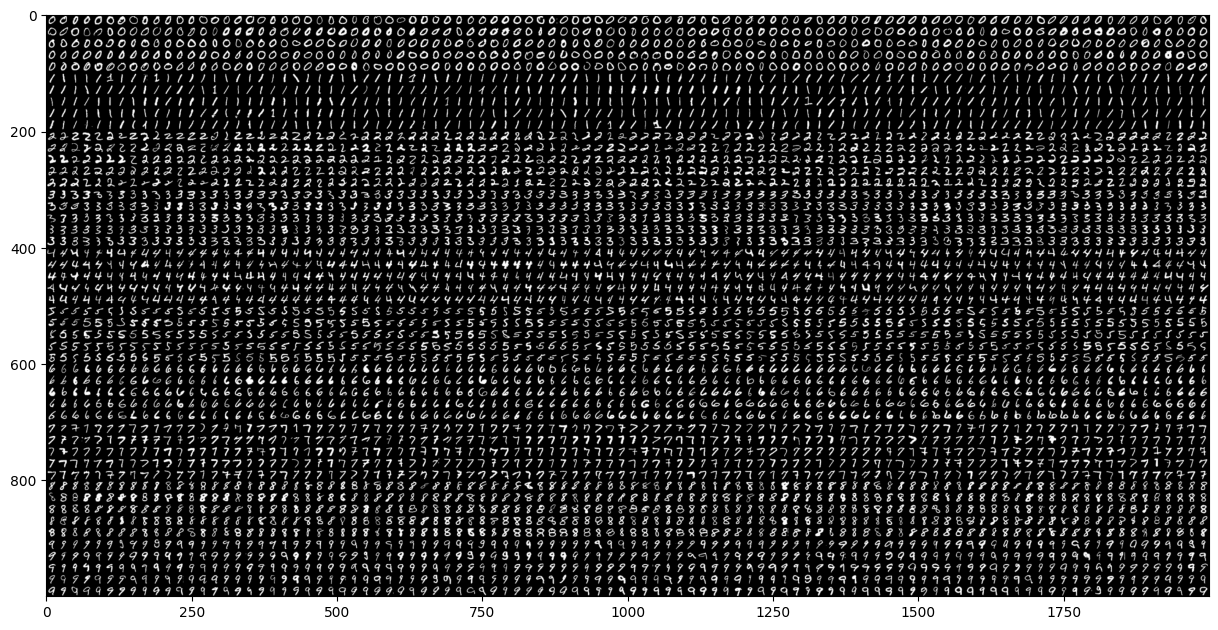

In [4]:
img = cv2.imread('dataset/english_digits.png', 0) #we need our image to be a single channel(grayscale) data
print(img.shape)
plt.figure(figsize=[15,30])
plt.imshow(img, cmap='gray')

Extracted dataset's shape:  (50, 100, 20, 20)


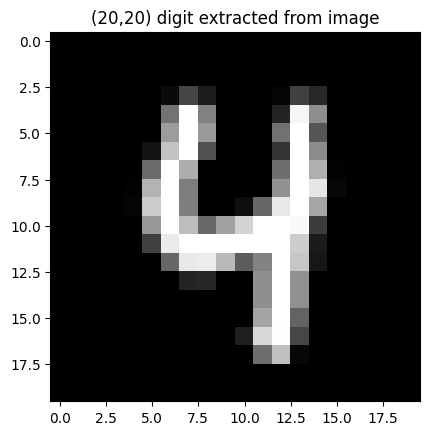

In [8]:
#Lets split our data -> by guides of dataset, we have 50 digits in one column and 100 digits in each row
#Therefore, we are gonna to split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row, 100) for row in np.vsplit(img,50) ]
dataset = np.array(cells)
print("Extracted dataset's shape: ", dataset.shape)
plt.imshow(dataset[20,20, :,:], cmap = "gray"); plt.title("(20,20) digit extracted from image"); plt.show()

In [9]:
#train and test split
train = dataset[:,:50].reshape(-1,400).astype(np.float32)
test = dataset[:,50:100].reshape(-1,400).astype(np.float32)
train.shape

(2500, 400)

In [10]:
#we have 2500 samples, and 10 classes, so we should build labels variables for train and test classes(data are orders and each 250 data samples will be same in K number of label and class)
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

## Model Training(KNN in Cv2.ML)

In [ ]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels) #ROW_SAMPLE -> we have our data stored in each row

#Accuracy section
ret,result,neighbours,dist = knn.findNearest(test,k=5)
# Now we check the accuracy of classification, For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct_count = np.count_nonzero(matches)
accuracy = correct_count *100.0/ result.size
print(accuracy)

91.76
